In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

C:\Users\infinire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dataset = pd.DataFrame(df.data,columns = df.feature_names)

In [6]:
dataset["price"]= df.target

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
X= dataset.iloc[:,:-1]#independent features
y=dataset.iloc[:,-1]#dependent features

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor = LinearRegression()

In [28]:
regressor

LinearRegression()

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
mse = cross_val_score(regressor,X,y,scoring="neg_mean_squared_error",cv=5)

In [31]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [32]:
np.mean(mse)

-37.13180746769906

## Ridge Regression - L2 Regularization

In [33]:
from sklearn.linear_model import Ridge

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
ridge = Ridge()

In [36]:
ridge

Ridge()

In [43]:
parameters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50,150,200]}

In [44]:
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40, 50,
                                   150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
print(ridge_regressor.best_params_)

{'alpha': 150}


In [46]:
print(ridge_regressor.best_score_)

-29.753617234142745


## Lasso Regression - L1 Regularization

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [48]:
lasso =Lasso()

In [64]:
parameters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50,150,200,250,300,400]}

In [65]:
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
lasso_regressor.fit(X,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\infinire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\infinire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.760e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\infinire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40, 50,
                                   150, 200, 250, 300, 400]},
             scoring='neg_mean_squared_error', verbose=1)

In [66]:
lasso_regressor.best_params_

{'alpha': 1}

In [67]:
lasso_regressor.best_score_

-35.53158022069486

## Prediction

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [70]:
prediction_lasso =lasso_regressor.predict(X_test)


In [71]:
prediction_ridge =ridge_regressor.predict(X_test)

In [72]:
import seaborn as sns

C:\Users\infinire\AppData\Local\Temp\ipykernel_8292\1028230056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<AxesSubplot: xlabel='price', ylabel='Density'>

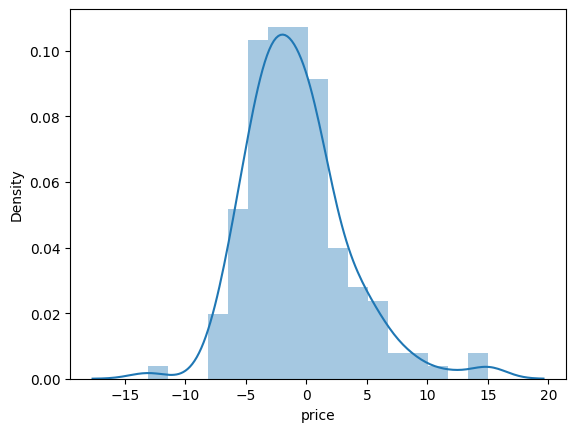

In [73]:
sns.distplot(y_test-prediction_lasso)

C:\Users\infinire\AppData\Local\Temp\ipykernel_8292\1693200975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<AxesSubplot: xlabel='price', ylabel='Density'>

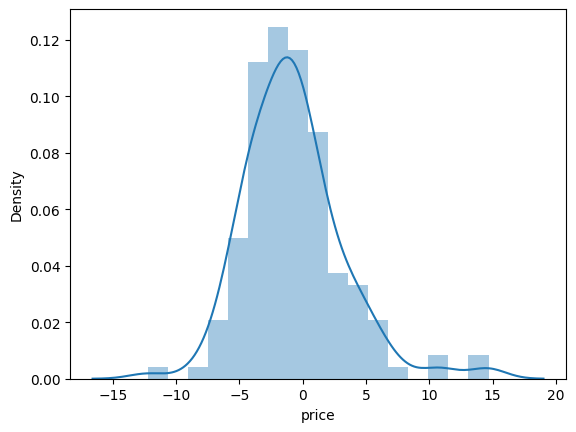

In [74]:
sns.distplot(y_test-prediction_ridge)

## R Square and Adjusted R square

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test,prediction_lasso)

0.697986757570101

In [77]:
r2_score(y_test,prediction_ridge)

0.7293191125218267